# 1. Export & cleaning data

### 1.1 Export

In [43]:
import numpy as np 
import pandas as pd
import sqlite3

df_olist_customers = pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_customers_dataset.csv')
df_olist_sellers = pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_sellers_dataset.csv')
df_olist_order_reviews= pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_order_reviews_dataset.csv')
df_olist_order_items= pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_order_items_dataset.csv')
df_olist_products= pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_products_dataset.csv')
df_olist_geolocation= pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_geolocation_dataset.csv')
df_product_category_name_translation= pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/product_category_name_translation.csv')
df_olist_orders = pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_orders_dataset.csv')
df_olist_order_payments= pd.read_csv('/Users/annanefedova/Desktop/Учеба /Developers Institute/repozitories/DI-final-project/Data/olist_order_payments_dataset.csv')

df_olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### 1.2 Cheaking & cleaning

In [44]:
df_olist_orders.duplicated().sum()

0

In [45]:
df_olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [46]:
df_olist_order_reviews.info()
df_olist_order_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### 1.3 Transfer data to SQL

In [47]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

df_olist_customers.to_sql("olist_customers", con =engine)
df_olist_sellers.to_sql("olist_sellers", con =engine)
df_olist_order_reviews.to_sql("olist_order_reviews", con =engine)
df_olist_order_items.to_sql("olist_order_items", con =engine)
df_olist_products.to_sql("olist_products_dataset", con =engine)
df_olist_geolocation.to_sql("olist_geolocation", con =engine)
df_product_category_name_translation.to_sql("product_category_name_translation", con =engine)
df_olist_orders.to_sql("olist_orders", con =engine)
df_olist_order_payments.to_sql("olist_order_payments", con =engine)
df_olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# 2. Looking for score corelations

### 2.1 Export Datetime data with SQL

In [48]:
sql = """
WITH items AS (
    SELECT
        order_id,
        MAX(shipping_limit_date) AS max_shipping_limit_date
    FROM olist_order_items
    GROUP BY order_id
)

SELECT
  o.order_id,
  o.order_purchase_timestamp,
  o.order_approved_at,
  o.order_delivered_customer_date,
  o.order_estimated_delivery_date,
  o.order_delivered_carrier_date,
  i.max_shipping_limit_date,
  r.review_score
FROM olist_orders AS o
JOIN items AS i
    ON o.order_id = i.order_id
JOIN olist_order_reviews AS r
    ON r.order_id = o.order_id
WHERE o.order_status = 'delivered'
  AND o.order_purchase_timestamp IS NOT NULL
  AND o.order_delivered_customer_date IS NOT NULL
  AND r.review_score IS NOT NULL
  AND o.order_delivered_customer_date >= o.order_delivered_carrier_date
  AND o.order_delivered_carrier_date >= o.order_approved_at
  AND o.order_approved_at >= o.order_purchase_timestamp;


"""

df_sql = pd.read_sql_query(sql,con=engine)
df_sql = df_sql.loc[:, ~df_sql.columns.duplicated()]

df_sql.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-04 19:55:00,2017-10-06 11:07:15,4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-26 14:31:00,2018-07-30 03:24:27,4
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 13:50:00,2018-08-13 08:55:23,5
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-22 13:39:59,2017-11-23 19:45:59,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-14 19:46:34,2018-02-19 20:31:37,5


### 2.2 Cheaking Order Approval Time vs Delivery Time by Review Score

In [49]:
# даты → datetime
for c in ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date", "order_approved_at", "max_shipping_limit_date"]:
    df_sql[c] = pd.to_datetime(df_sql[c])

df_sql["approval_hours"] = (df_sql["order_approved_at"] - df_sql["order_purchase_timestamp"]).dt.total_seconds() / 3600
df_sql["approval_days_1dp"] = (df_sql["approval_hours"] / 24).round(1)

# дни доставки (от покупки до факта доставки)
df_sql["delivery_days"] = (df_sql["order_delivered_customer_date"] - df_sql["order_purchase_timestamp"]).dt.total_seconds() / 86400
df_sql["delivery_days_1dp"] = df_sql["delivery_days"].round(1)
 
df_sql.head()


,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,delivery_days,delivery_days_1dp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-04 19:55:00,2017-10-06 11:07:15,4,0.178333,0.0,8.436574,8.4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26 14:31:00,2018-07-30 03:24:27,4,30.713889,1.3,13.782037,13.8
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08 13:50:00,2018-08-13 08:55:23,5,0.276111,0.0,9.394213,9.4
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-22 13:39:59,2017-11-23 19:45:59,5,0.298056,0.0,13.208750,13.2
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-14 19:46:34,2018-02-19 20:31:37,5,1.030556,0.0,2.873877,2.9


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

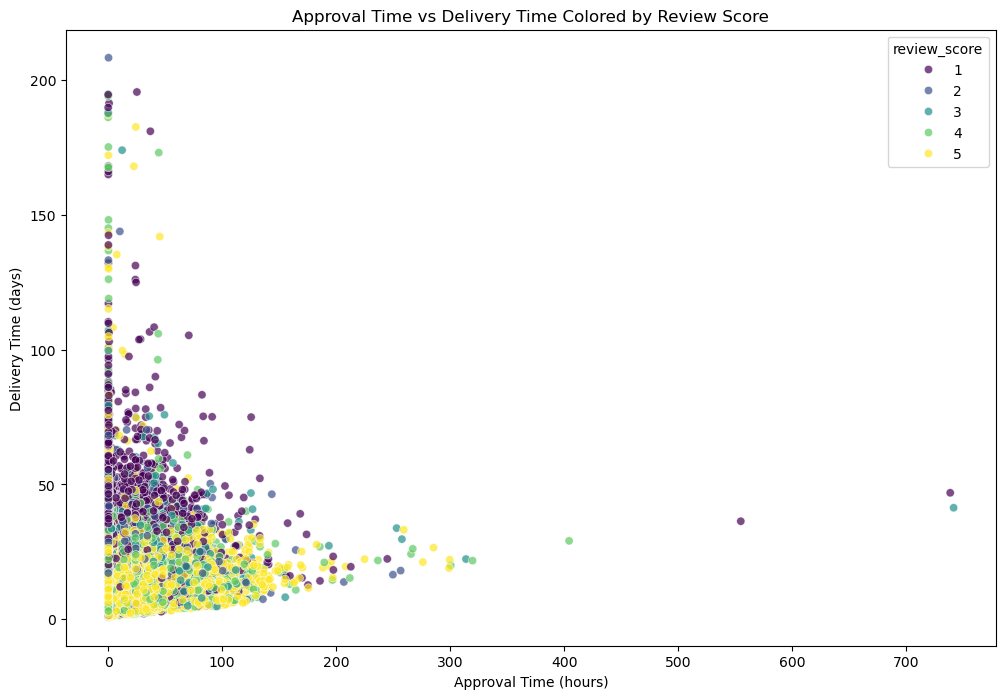

In [51]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_sql, x='approval_hours', y='delivery_days', hue='review_score', palette='viridis', alpha=0.7)
plt.title('Approval Time vs Delivery Time Colored by Review Score')
plt.xlabel('Approval Time (hours)')
plt.ylabel('Delivery Time (days)')
plt.show()

Conclusion: There is no clear correlation between approval time and review score. However, longer delivery times tend to be associated with lower review scores.

### 2.3 Cheackinh how delivery delay affects review score

In [52]:
# опоздал ли относительно обещанной даты (по желанию)
df_sql["late_flag"] = df_sql["order_delivered_customer_date"] > df_sql["order_estimated_delivery_date"]

delay = df_sql[df_sql['late_flag'] == 1]['late_flag'].count()
ontime = df_sql[df_sql['late_flag'] == 0]['late_flag'].count()
print(f"Number of late deliveries: {delay}")
print(f"Number of on-time deliveries: {ontime}")

Number of late deliveries: 7666
Number of on-time deliveries: 87304


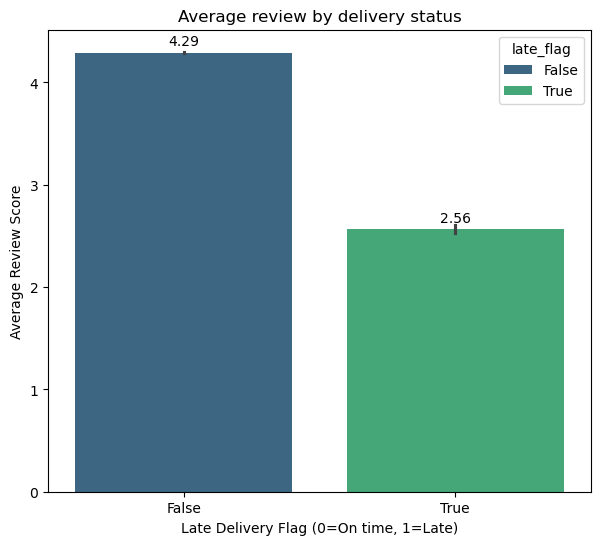

In [53]:
plt.figure(figsize=(7,6))
ax = sns.barplot(
    data=df_sql,
    x="late_flag",
    y="review_score",
    hue='late_flag',
    estimator=np.mean,
    palette="viridis"
)

for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", padding=3)

plt.title("Average review by delivery status")
plt.xlabel("Late Delivery Flag (0=On time, 1=Late)")
plt.ylabel("Average Review Score")
plt.show()


In [54]:

df_sql["hours_late"] = (df_sql["order_delivered_customer_date"] - df_sql["order_estimated_delivery_date"]).dt.total_seconds() / 3600
df_sql["days_late"] = (df_sql["hours_late"] / 24).round(1)

df_sql.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,delivery_days,delivery_days_1dp,late_flag,hours_late,days_late
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-04 19:55:00,2017-10-06 11:07:15,4,0.178333,0.0,8.436574,8.4,False,-170.579722,-7.1
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26 14:31:00,2018-07-30 03:24:27,4,30.713889,1.3,13.782037,13.8,False,-128.537500,-5.4
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08 13:50:00,2018-08-13 08:55:23,5,0.276111,0.0,9.394213,9.4,False,-413.891944,-17.2
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-22 13:39:59,2017-11-23 19:45:59,5,0.298056,0.0,13.208750,13.2,False,-311.521667,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-14 19:46:34,2018-02-19 20:31:37,5,1.030556,0.0,2.873877,2.9,False,-221.716111,-9.2


In [55]:
q = pd.qcut(df_sql[df_sql['days_late'] > 0]['days_late'], 6, duplicates='drop')
late_rate = df_sql.groupby(q)['review_score'].mean().reset_index(name='review_score')
print(late_rate)

       days_late  review_score
0   (0.099, 1.0]      4.014162
1     (1.0, 2.9]      3.510638
2     (2.9, 5.8]      2.524362
3     (5.8, 8.9]      1.836814
4    (8.9, 15.7]      1.668289
5  (15.7, 189.0]      1.718299


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_21013/64959458.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_rate = df_sql.groupby(q)['review_score'].mean().reset_index(name='review_score')


Conclusion: delivery delay has segnificant affect at review score

### 2.4 At what stage are delivery delays most common? Before the order is handed over to the carrier or after?

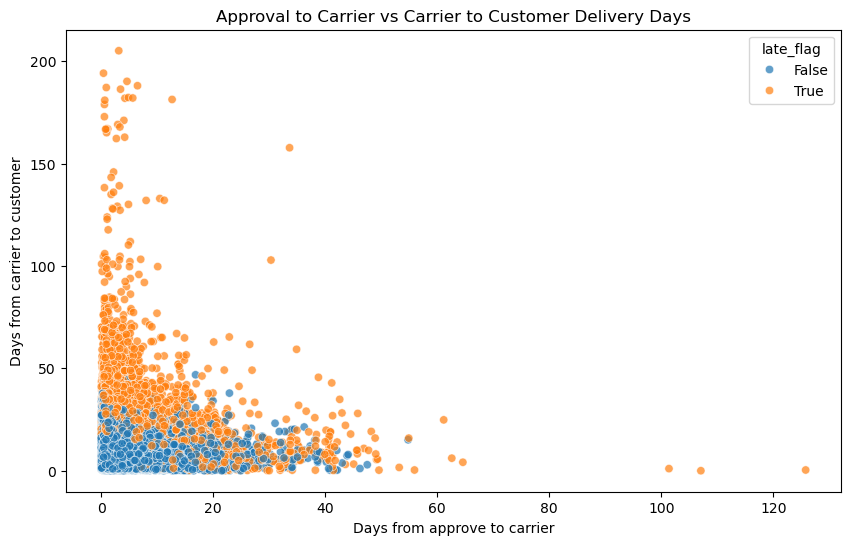

In [56]:
for c in ["order_delivered_carrier_date", "order_approved_at", "order_delivered_customer_date"]:
    df_sql[c] = pd.to_datetime(df_sql[c])

df_sql['approve_to_carrier_days']=df_sql['order_delivered_carrier_date']-df_sql['order_approved_at']
df_sql['approve_to_carrier_days']=df_sql['approve_to_carrier_days'].dt.total_seconds()/86400

df_sql['carrier_to_customer_days']=df_sql['order_delivered_customer_date']-df_sql['order_delivered_carrier_date']
df_sql['carrier_to_customer_days']=df_sql['carrier_to_customer_days'].dt.total_seconds()/86400

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sql, x='approve_to_carrier_days', y='carrier_to_customer_days', hue='late_flag', alpha=0.7)
plt.title('Approval to Carrier vs Carrier to Customer Delivery Days')
plt.xlabel('Days from approve to carrier')
plt.ylabel('Days from carrier to customer')
plt.show()

Conclusion: The number of days an order is held by the carrier affects order delays more often than delays at the supplier's. However, supplier delays also affect the overall order delay.

### 2.5 Does the distance between the supplier and the customer affect the delay?

In [57]:
sql2 = """
WITH geo_zip AS (
  SELECT
    geolocation_zip_code_prefix AS zip,
    geolocation_state AS state,
    geolocation_city  AS city,
    AVG(geolocation_lat) AS lat,
    AVG(geolocation_lng) AS lng
  FROM olist_geolocation
  GROUP BY geolocation_zip_code_prefix, geolocation_state, geolocation_city
),
sellers_info AS (
  SELECT s.seller_id, gz.lat AS seller_lat, gz.lng AS seller_lng
  FROM olist_sellers s
  JOIN geo_zip gz ON gz.zip = s.seller_zip_code_prefix
),
customers_info AS (
  SELECT c.customer_id, gz.lat AS customer_lat, gz.lng AS customer_lng
  FROM olist_customers c
  JOIN geo_zip gz ON gz.zip = c.customer_zip_code_prefix
)
SELECT
  oi.order_id,
  oi.product_id,
  si.seller_lat, si.seller_lng,
  ci.customer_lat, ci.customer_lng
FROM olist_order_items oi
JOIN olist_orders o        ON o.order_id = oi.order_id
JOIN sellers_info si       ON si.seller_id   = oi.seller_id
JOIN customers_info ci     ON ci.customer_id = o.customer_id
WHERE o.order_status = 'delivered';

"""

df_sql2 = pd.read_sql_query(sql2,con=engine)
df_sql2 = df_sql2.loc[:, ~df_sql2.columns.duplicated()]

df_sql.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,delivery_days,delivery_days_1dp,late_flag,hours_late,days_late,approve_to_carrier_days,carrier_to_customer_days
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-04 19:55:00,2017-10-06 11:07:15,4,0.178333,0.0,8.436574,8.4,False,-170.579722,-7.1,2.366493,6.062650
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26 14:31:00,2018-07-30 03:24:27,4,30.713889,1.3,13.782037,13.8,False,-128.537500,-5.4,0.462882,12.039410
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08 13:50:00,2018-08-13 08:55:23,5,0.276111,0.0,9.394213,9.4,False,-413.891944,-17.2,0.204595,9.178113
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-22 13:39:59,2017-11-23 19:45:59,5,0.298056,0.0,13.208750,13.2,False,-311.521667,-13.0,3.745833,9.450498
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-14 19:46:34,2018-02-19 20:31:37,5,1.030556,0.0,2.873877,2.9,False,-221.716111,-9.2,0.893113,1.937824


In [58]:

R = 6371.0  # радиус Земли, км

lat1 = np.radians(df_sql2["seller_lat"])
lon1 = np.radians(df_sql2["seller_lng"])
lat2 = np.radians(df_sql2["customer_lat"])
lon2 = np.radians(df_sql2["customer_lng"])

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
df_sql2["distance_seller_customer_km"] = 2 * R * np.arcsin(np.sqrt(a))

# (опционально) округлить
df_sql2["distance_seller_customer_km"] = df_sql2["distance_seller_customer_km"].round(1)

df_sql2.head()

,order_id,product_id,seller_lat,seller_lng,customer_lat,customer_lng,distance_seller_customer_km
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,-23.680885,-46.443695,-23.578134,-46.587026,18.5
1,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,-23.680705,-46.444323,-23.578134,-46.587026,18.5
2,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,-23.680885,-46.443695,-23.576818,-46.587181,18.6
3,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,-23.680705,-46.444323,-23.576818,-46.587181,18.6
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,-19.807681,-43.980427,-12.177924,-44.660711,851.5


In [59]:
dist_per_order = (
    df_sql2.groupby("order_id")["distance_seller_customer_km"]
           .max()
)

df_sql = df_sql.merge(dist_per_order, on="order_id", how="left")
df_sql.describe()


,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,delivery_days,delivery_days_1dp,hours_late,days_late,approve_to_carrier_days,carrier_to_customer_days,distance_seller_customer_km
count,94970,94970,94970,94970,94970,94970,94970.000000,94970.000000,94970.000000,94970.000000,94970.000000,94970.000000,94970.000000,94970.000000,94970.000000,94496.000000
mean,2017-12-30 23:17:00.044477440,2017-12-31 08:56:19.186195968,2018-01-12 13:14:55.082763264,2018-01-23 17:16:41.267768576,2018-01-03 05:15:58.475076352,2018-01-06 13:37:31.577845504,4.153627,9.655317,0.394263,12.581887,12.581821,-268.029496,-11.167940,2.846983,9.332600,602.339685
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-11 13:46:32,2016-10-04 00:00:00,2016-10-08 10:34:01,2016-09-19 23:11:33,1.000000,0.000000,0.000000,0.533414,0.500000,-3504.386944,-146.000000,0.000174,0.000000,0.000000
25%,2017-09-12 18:19:19.500000,2017-09-13 03:25:12.500000,2017-09-22 21:59:31.500000,2017-10-04 00:00:00,2017-09-14 21:49:21,2017-09-19 20:27:42,4.000000,0.214444,0.000000,6.808675,6.800000,-389.564097,-16.200000,0.900663,4.108180,190.100000
50%,2018-01-17 22:24:14,2018-01-18 09:37:17.500000,2018-01-31 18:19:25,2018-02-14 00:00:00,2018-01-22 20:01:01.500000,2018-01-25 02:37:56,5.000000,0.337778,0.000000,10.264045,10.300000,-280.383889,-11.700000,1.849201,7.106036,436.200000
75%,2018-05-03 16:43:42,2018-05-03 23:10:54,2018-05-14 18:51:35.500000,2018-05-25 00:00:00,2018-05-07 13:50:00,2018-05-10 01:30:26.750000128,5.000000,13.569792,0.600000,15.776973,15.800000,-153.138056,-6.400000,3.615104,12.046372,801.200000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-10-17 13:22:46,2018-10-25 00:00:00,2018-09-11 19:48:28,2020-04-09 22:35:08,5.000000,741.443611,30.900000,208.351759,208.400000,4535.401944,189.000000,125.762569,205.190972,8677.900000
std,NaN,NaN,NaN,NaN,NaN,NaN,1.286332,19.118088,0.800452,9.481746,9.481698,243.138534,10.130816,3.461772,8.685619,594.108994


In [60]:
q = pd.qcut(df_sql.loc[df_sql['distance_seller_customer_km'] <= 3600, 'distance_seller_customer_km'], 10, duplicates='drop')
late_rate = df_sql.groupby(q)['late_flag'].mean().reset_index(name='late_rate')
print(late_rate)

  distance_seller_customer_km  late_rate
0              (-0.001, 35.1]   0.063657
1               (35.1, 118.1]   0.066321
2             (118.1, 279.24]   0.061891
3             (279.24, 348.9]   0.074778
4              (348.9, 436.2]   0.075872
5              (436.2, 531.9]   0.075090
6             (531.9, 697.26]   0.089543
7             (697.26, 877.7]   0.080080
8             (877.7, 1457.2]   0.088033
9            (1457.2, 3399.2]   0.130573


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_21013/981526942.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_rate = df_sql.groupby(q)['late_flag'].mean().reset_index(name='late_rate')


Conclusion: Distance has only a small impact on late delivery. Most distance groups have similar delay rates, and only the longest distances show a clear increase in delays.

### 2.6 Cheacing sellers delayes by delivery status

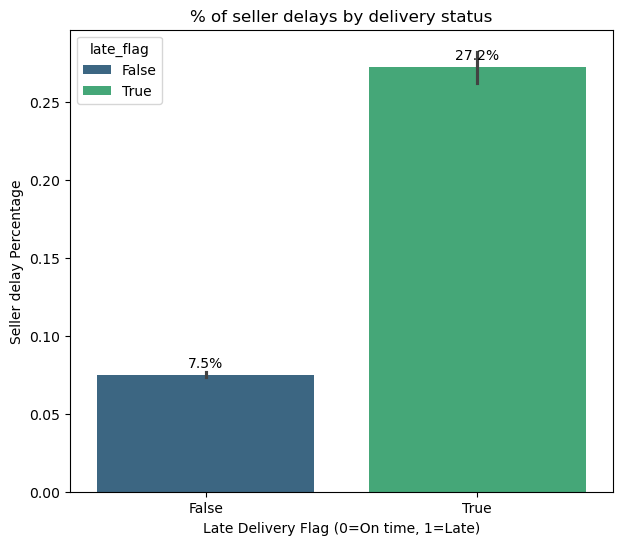

In [61]:
df_sql["seller_delay_flag"] = df_sql["order_delivered_carrier_date"] > df_sql["max_shipping_limit_date"]

dfp = df_sql.copy()
dfp["seller_delay_flag"] = dfp["seller_delay_flag"].astype(int)

plt.figure(figsize=(7,6))
ax = sns.barplot(
    data=dfp,
    x="late_flag",
    y="seller_delay_flag",
    estimator=np.mean,
    hue='late_flag',
    palette="viridis"
)

for c in ax.containers:
    ax.bar_label(
    c,
    labels=[f"{b.get_height()*100:.1f}%" for b in c],
    padding=3
)

plt.title("% of seller delays by delivery status")
plt.xlabel("Late Delivery Flag (0=On time, 1=Late)")
plt.ylabel("Seller delay Percentage")
plt.show()


Conclusion: In 27.2% of cases where an order was delayed, the seller delayed shipping. Also, in 7.5% of cases where the order arrived on time, it was still delayed by the supplier. We see that supplier delays do have an impact on order delays, but not a significant one. A more significant percentage of delays are due to the carrier.

### 2.7 risky sellers

In [62]:
sql4 = """ 
SELECT seller_id, oi.order_id, shipping_limit_date, order_delivered_carrier_date
FROM olist_order_items AS oi
JOIN olist_orders AS oo ON oo.order_id = oi.order_id
WHERE oo.order_status = 'delivered';
"""
df_sql4 = pd.read_sql_query(sql4,con=engine)
df_sql4 = df_sql4.loc[:, ~df_sql4.columns.duplicated()]

df_sql4["seller_late_flag"] = df_sql4["order_delivered_carrier_date"] > df_sql4["shipping_limit_date"]

df_sql4["seller_late_flag"] = df_sql4["seller_late_flag"].fillna(0).astype(int)


seller_delay_stats = df_sql4.groupby("seller_id")["seller_late_flag"].agg(
    total_orders = "count", 
    late_orders  = "sum",
    late_rate    = "mean" 
).reset_index()

seller_delay_stats.describe()


,total_orders,late_orders,late_rate
count,2970.000000,2970.000000,2970.000000
mean,37.103367,3.457912,0.119641
std,119.672968,14.233075,0.236618
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000
75%,26.000000,2.000000,0.125000
max,1996.000000,416.000000,1.000000


In [63]:

# 1. Считаем 75-й перцентиль доли опозданий
# late_thr = seller_delay_stats["late_rate"].quantile(0.75)
late_thr = 0
late_thr


0

In [64]:
# 2. Флаг "риск задержек" для продавца
# 1 = продавец в группе риска, 0 = норм
seller_delay_stats["seller_risk_flag"] = (
    seller_delay_stats["late_rate"] > late_thr
).astype(int)

seller_delay_stats.head()


,seller_id,total_orders,late_orders,late_rate,seller_risk_flag
0,0015a82c2db000af6aaaf3ae2ecb0532,3,0,0.000000,0
1,001cca7ae9ae17fb1caed9dfb1094831,234,12,0.051282,1
2,002100f778ceb8431b7a1020ff7ab48f,54,5,0.092593,1
3,003554e2dce176b5555353e4f3555ac8,1,0,0.000000,0
4,004c9cd9d87a3c30c522c48c4fc07416,168,0,0.000000,0


In [65]:
sql5 = """
SELECT
  oi.order_id, product_id, seller_id

FROM olist_order_items AS oi

"""

df_sql5 = pd.read_sql_query(sql5,con=engine)
df_sql5 = df_sql5.loc[:, ~df_sql5.columns.duplicated()]

df_sql5.head()

,order_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [66]:
# добавляем к каждому товару флаг риска его продавца
df_items_risk = df_sql5.merge(
    seller_delay_stats[["seller_id", "seller_risk_flag"]],
    on="seller_id",
    how="left"
)

# NaN → 0 и делаем int
df_items_risk["seller_risk_flag"] = (
    df_items_risk["seller_risk_flag"]
    .fillna(0)
    .astype(int)
)

df_items_risk.head()


,order_id,product_id,seller_id,seller_risk_flag
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1


In [67]:
order_risk_stats = (
    df_items_risk
    .groupby("order_id")["seller_risk_flag"]
    .sum()
    .reset_index(name="n_risky_sellers")
)

order_risk_stats.head()


,order_id,n_risky_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [68]:
df_sql = df_sql.merge(order_risk_stats, on="order_id", how="left")
df_sql["n_risky_sellers"] = df_sql["n_risky_sellers"].fillna(0).astype(int)

df_sql.head()


,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,delivery_days,delivery_days_1dp,late_flag,hours_late,days_late,approve_to_carrier_days,carrier_to_customer_days,distance_seller_customer_km,seller_delay_flag,n_risky_sellers
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-04 19:55:00,2017-10-06 11:07:15,4,0.178333,0.0,8.436574,8.4,False,-170.579722,-7.1,2.366493,6.062650,18.6,False,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26 14:31:00,2018-07-30 03:24:27,4,30.713889,1.3,13.782037,13.8,False,-128.537500,-5.4,0.462882,12.039410,851.5,False,1
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08 13:50:00,2018-08-13 08:55:23,5,0.276111,0.0,9.394213,9.4,False,-413.891944,-17.2,0.204595,9.178113,514.4,False,1
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-22 13:39:59,2017-11-23 19:45:59,5,0.298056,0.0,13.208750,13.2,False,-311.521667,-13.0,3.745833,9.450498,1822.6,False,1
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-14 19:46:34,2018-02-19 20:31:37,5,1.030556,0.0,2.873877,2.9,False,-221.716111,-9.2,0.893113,1.937824,29.7,False,1


### 2.7 Cheaking other features

In [69]:
sql3 = """
SELECT
  oi.order_id,
  MAX (oi.order_item_id) AS n_items,
  COUNT(DISTINCT seller_id) AS n_sellers,
  SUM (oi.price) AS order_value,
  SUM (oi.freight_value) AS total_freight_value,
  cust.customer_state,
  pay.payment_type

FROM olist_order_items AS oi
JOIN olist_orders AS o ON oi.order_id = o.order_id
JOIN olist_customers AS c ON o.customer_id = c.customer_id
JOIN olist_order_payments AS pay ON o.order_id = pay.order_id
JOIN olist_customers AS cust ON o.customer_id = cust.customer_id
GROUP BY oi.order_id

"""

df_sql3 = pd.read_sql_query(sql3,con=engine)
df_sql3 = df_sql3.loc[:, ~df_sql3.columns.duplicated()]

df_sql3.head()

,order_id,n_items,n_sellers,order_value,total_freight_value,customer_state,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,58.90,13.29,RJ,credit_card
1,00018f77f2f0320c557190d7a144bdd3,1,1,239.90,19.93,SP,credit_card
2,000229ec398224ef6ca0657da4fc703e,1,1,199.00,17.87,MG,credit_card
3,00024acbcdf0a6daa1e931b038114c75,1,1,12.99,12.79,SP,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,199.90,18.14,SP,credit_card


In [70]:
df_sql = df_sql.merge(df_sql3, on="order_id", how="left")

df_sql.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,...,carrier_to_customer_days,distance_seller_customer_km,seller_delay_flag,n_risky_sellers,n_items,n_sellers,order_value,total_freight_value,customer_state,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-04 19:55:00,2017-10-06 11:07:15,4,0.178333,0.0,...,6.062650,18.6,False,0,1.0,1.0,89.97,26.16,SP,credit_card
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26 14:31:00,2018-07-30 03:24:27,4,30.713889,1.3,...,12.039410,851.5,False,1,1.0,1.0,118.70,22.76,BA,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08 13:50:00,2018-08-13 08:55:23,5,0.276111,0.0,...,9.178113,514.4,False,1,1.0,1.0,159.90,19.22,GO,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-22 13:39:59,2017-11-23 19:45:59,5,0.298056,0.0,...,9.450498,1822.6,False,1,1.0,1.0,45.00,27.20,RN,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-14 19:46:34,2018-02-19 20:31:37,5,1.030556,0.0,...,1.937824,29.7,False,1,1.0,1.0,19.90,8.72,SP,credit_card


In [ ]:
df_sql["purchase_weekday_num"] = df_sql["order_purchase_timestamp"].dt.weekday
df_sql["purchase_weekday"]     = df_sql["order_purchase_timestamp"].dt.day_name()  # 'Monday', 'Tuesday', ...

# час покупки (0–23)
df_sql["purchase_hour"] = df_sql["order_purchase_timestamp"].dt.hour

df_sql["customer_state_num"] = df_sql["customer_state"].astype('category').cat.codes
df_sql["payment_type_num"] = df_sql["payment_type"].astype('category').cat.codes


df_sql.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,max_shipping_limit_date,review_score,approval_hours,approval_days_1dp,...,n_sellers,order_value,total_freight_value,customer_state,payment_type,purchase_weekday_num,purchase_weekday,purchase_hour,customer_state_num,payment_type_num
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-04 19:55:00,2017-10-06 11:07:15,4,0.178333,0.0,...,1.0,89.97,26.16,SP,credit_card,0,Monday,10,25,1
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26 14:31:00,2018-07-30 03:24:27,4,30.713889,1.3,...,1.0,118.70,22.76,BA,boleto,1,Tuesday,20,4,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08 13:50:00,2018-08-13 08:55:23,5,0.276111,0.0,...,1.0,159.90,19.22,GO,credit_card,2,Wednesday,8,8,1
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-22 13:39:59,2017-11-23 19:45:59,5,0.298056,0.0,...,1.0,45.00,27.20,RN,credit_card,5,Saturday,19,19,1
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-14 19:46:34,2018-02-19 20:31:37,5,1.030556,0.0,...,1.0,19.90,8.72,SP,credit_card,1,Tuesday,21,25,1


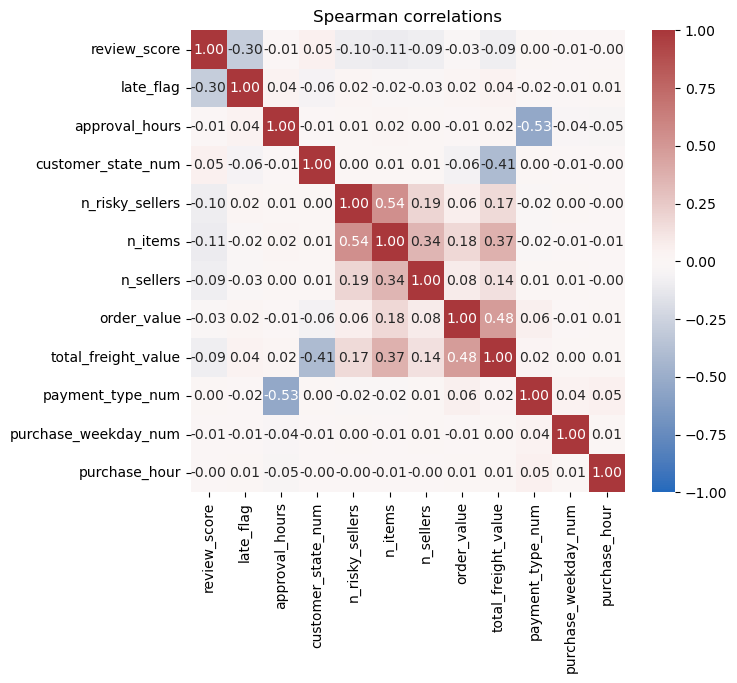

In [88]:
import seaborn as sns, matplotlib.pyplot as plt, numpy as np

cols = [
    "review_score","late_flag","approval_hours","customer_state_num","n_risky_sellers","n_items","n_sellers",
    "order_value","total_freight_value","payment_type_num", "purchase_weekday_num", "purchase_hour"
]
use = [c for c in cols if c in df_sql.columns]
corr = df_sql[use].corr(method="spearman")

plt.figure(figsize=(7,6))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="vlag", annot=True, fmt=".2f")
plt.title("Spearman correlations")
plt.show()


### ML model

In [73]:
# --- Imports & setup ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [94]:
# --- Feature assembly (no leakage) ---
# Ensure datetime
df = df_sql.copy()
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# Promised delivery days available at purchase time
df["promised_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.total_seconds()/86400
df["seller_delay_flag"] = df["seller_delay_flag"].astype(int)

# If weekday/hour not created yet, uncomment:
# df["purchase_weekday_num"] = df["order_purchase_timestamp"].dt.weekday
# df["purchase_hour"] = df["order_purchase_timestamp"].dt.hour

num_features = [
    "n_items", "n_sellers", "order_value",
    "distance_seller_customer_km",
    "purchase_weekday_num", "purchase_hour",
    "approval_days_1dp", "promised_days", 
    "seller_delay_flag", "total_freight_value",
    "approval_hours","customer_state_num",
    "n_risky_sellers","payment_type_num"
]

cat_features = [ "customer_state", "payment_type"]

TARGET = "late_flag"

# Keep only needed columns
data = df[num_features + cat_features + [TARGET]].copy()

# Numeric features only here; imputation will handle NaN
X = data[num_features + cat_features]
y = data[TARGET].astype(int)

print("Shape before dropna:", X.shape)
print("Target positive rate (late):", y.mean().round(3))


Shape before dropna: (94970, 16)
Target positive rate (late): 0.081


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])
print("Train late share:", y_train.mean().round(3))
print("Test late share:", y_test.mean().round(3))

Train size: 75976
Test size: 18994
Train late share: 0.081
Test late share: 0.081


In [96]:

# Numeric preprocessing: median imputation + scaling (scaling RF not required but ok)
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])

cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_features),
    ("cat", cat_pipe, cat_features)
], remainder="drop")

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  rf)
])

pipe.fit(X_train, y_train)



,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [100]:
# --- Test metrics: Accuracy, F1, ROC-AUC ---
proba = pipe.predict_proba(X_test)[:, 1]           # P(late=1)
thr = 0.3
pred = (proba >= thr).astype(int)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("F1 (late):", round(f1_score(y_test, pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 3))
print()
print(classification_report(y_test, pred, digits=3))


Accuracy: 0.912
F1 (late): 0.246
ROC-AUC: 0.754

              precision    recall  f1-score   support

           0      0.931     0.977     0.953     17461
           1      0.399     0.177     0.246      1533

    accuracy                          0.912     18994
   macro avg      0.665     0.577     0.599     18994
weighted avg      0.888     0.912     0.896     18994



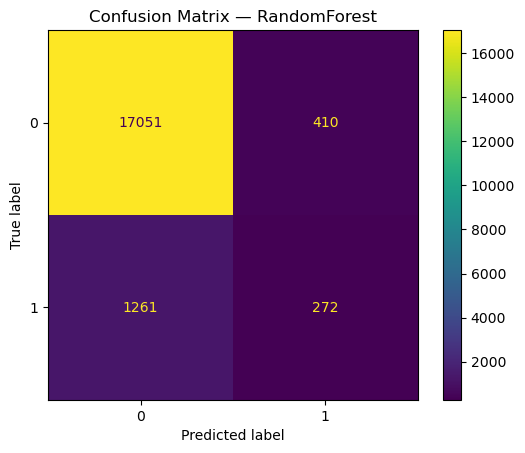

In [101]:

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("Confusion Matrix — RandomForest")
plt.show()


In [102]:
# Numeric pipeline: fill NaN with median + scale
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: fill NaN with most frequent + one-hot encode
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# Combine numeric and categorical pipelines
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features)
    ],
    remainder="drop"
)


In [103]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg = LogisticRegression(
    class_weight="balanced",  # handle class imbalance
    max_iter=500,
    n_jobs=-1,
    solver="lbfgs"
)

# Full pipeline: preprocessing + model
pipe_lr = Pipeline([
    ("prep", preprocess),
    ("clf", logreg)
])

# Fit model
pipe_lr.fit(X_train, y_train)


,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [106]:
# Predict probabilities for the positive class (late = 1)
proba = pipe_lr.predict_proba(X_test)[:, 1]

# You can play with threshold
thr = 0.5
pred = (proba >= thr).astype(int)

print("THRESHOLD:", thr)
print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("F1 (late=1):", round(f1_score(y_test, pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 3))
print()
print(classification_report(y_test, pred, digits=3))


THRESHOLD: 0.5
Accuracy: 0.706
F1 (late=1): 0.263
ROC-AUC: 0.749

              precision    recall  f1-score   support

           0      0.958     0.711     0.816     17461
           1      0.165     0.649     0.263      1533

    accuracy                          0.706     18994
   macro avg      0.562     0.680     0.540     18994
weighted avg      0.894     0.706     0.772     18994



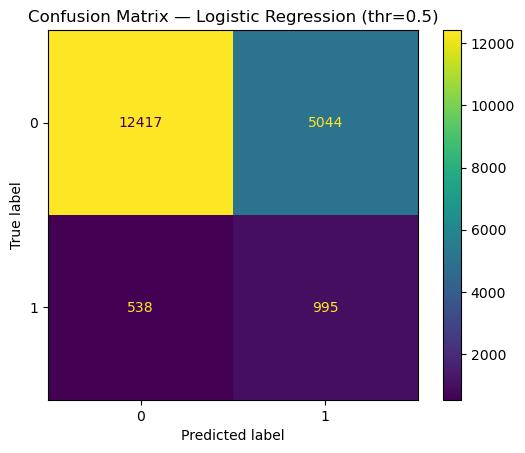

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title(f"Confusion Matrix — Logistic Regression (thr={thr})")
plt.show()
